### The goal of this notebook is to make sure that the difference in beaching time scale locations for the crude and refined cases is not simply an issue of a different grid orientation in output files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.dates as mpd
import cmocean as cm
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sys import platform

%matplotlib inline

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
    out_dir = '/Users/rmueller/Documents/Presentations/2020/OceanSciences2020/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'
    out_dir = '/home/vdo/'
    
# Set to [1] if you want to print to file and [0] if not
print_to_file = 1  

In [4]:
## User inputs.  As set up now, darwin -> paths on Rachael's "shuga" laptop 
## The other paths are for Vicky's Ocean setup

if platform == 'darwin':
    bathy_dir = '/Users/rmueller/Data/SalishSeaCast/grid/'
    results_dir = '/Users/rmueller/Projects/'
else:
    bathy_dir = '/data/vdo/MEOPAR/NEMO-forcing/grid/'
    results_dir = '/ocean/vdo/'

In [5]:
## colourmap for the land/water. 
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.85 / vmax, 'lightskyblue'), #change this if you want a different colour for water
                                                    (0.850001 / vmax, 'papayawhip'), #change this if you want a different colour for land
                                                    (1 / vmax, 'papayawhip')] #change this if you want a different colour for land
                                        )

In [6]:
# load data
# Note: The filename says SOG but the results show that it's not an SOG location
#bunker = nc.Dataset(results_dir + 'MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_general_evap_fix2/Lagrangian_BunkerC_crude_SOG_21nov17-28nov17.nc')
#diesel = nc.Dataset(results_dir + 'MIDOSS/results/OS2020/diesel/SB/Lagrangian_DieselFuel_refined_21nov17-28nov17_Diesel.nc')

bunker = xr.open_dataset(results_dir + 'MIDOSS/results/HeavyFloater/SOG_21nov17-28nov17_general_evap_fix2/Lagrangian_BunkerC_crude_SOG_21nov17-28nov17.nc')
diesel = xr.open_dataset(results_dir + 'MIDOSS/results/OS2020/diesel/SB/Lagrangian_DieselFuel_refined_21nov17-28nov17_Diesel.nc')

In [7]:
#bt_bunker = bunker.variables['Beaching_Time'][:] # This is if using nc.Dataset for reading in values
bunker_time = bunker.Beaching_Time[:]
bunker_time.shape

(896, 396)

In [8]:
#bt_diesel = diesel.variables['Beaching_Time'][:] # This is if using nc.Dataset for reading in values
diesel_time = diesel.Beaching_Time[:]
diesel_time.shape

(896, 396)

In [9]:
#~~~~~ NEED TO UPDATE THIS TO AUTOMATE START_TIME DEFINITION FOR MORE GENERAL APPLICATION  ~~~~~~~~~
start_time = np.datetime64('2017-11-21T00:30:00')
start_time

numpy.datetime64('2017-11-21T00:30:00')

In [10]:
bunker_time.values[0,0]

numpy.datetime64('2017-11-21T00:30:00.000000000')

In [11]:
# get size of array 
[ny,nx] = diesel_time.shape
ny

896

In [12]:
x_range = range(nx)
y_range = range(ny)
y_range

range(0, 896)

In [13]:
# get bunker time as numeric value
bunker_time_asnum = np.array([[((start_time - np.datetime64(bunker_time.values[jj,ii])) / np.timedelta64(1, 's')) for ii in x_range] for jj in y_range])

In [29]:
# get diesel time as numeric value
diesel_time_asnum = np.array([[((start_time - np.datetime64(diesel_time.values[jj,ii])) / np.timedelta64(1, 's')) for ii in x_range] for jj in y_range])

In [30]:
# set zero values to NaN
bunker_time_asnum[bunker_time_asnum==0] = np.nan
diesel_time_asnum[diesel_time_asnum==0] = np.nan

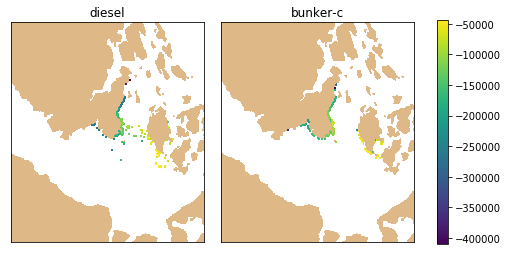

In [42]:
fig, axs = plt.subplots(1,2)

# add land mask to ax1 and ax2
viz_tools.plot_land_mask(axs[0],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')
viz_tools.plot_land_mask(axs[1],'/Users/rmueller/Projects/MIDOSS/MIDOSS-MOHID-grid/AfterNEMOBathy201702.nc', color = 'burlywood')

# add beaching time scales
mappable = axs[0].pcolormesh(diesel_time_asnum)
mappable = axs[1].pcolormesh(bunker_time_asnum)

axs[0].set_title("diesel")
axs[1].set_title("bunker-c")

for a in axs:
    a.get_xaxis().set_visible(False)
    a.get_yaxis().set_visible(False)
    viz_tools.set_aspect(a)
    a.set_xlim(100,300) #change this to set x axis limits
    a.set_ylim(200,400) #change this to set y axis limits
    
plt.tight_layout();

ax_cbar = fig.add_axes([1.02,0.11,0.025,.78])
cbar = plt.colorbar(mappable, cax=ax_cbar, orientation='vertical')


### well, the time values need to be corrected but the 2D representation is consistent!  
### Onward for now....
